In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Better plot style
sns.set(style="whitegrid")

# Load ML-ready data
df = pd.read_csv(
    "../data/ml_ready_dataset_new.csv",
    parse_dates=["from_date"]
)

df.head()


,from_date,station_id,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,Temp,RH,...,is_secondary_event,is_local_event,hour,day_of_week,is_weekend,is_winter,is_early_month,PM25_lag_1,PM25_lag_6,PM25_lag_24
0,2025-01-01 00:00:00,Peenya,32.20,0.66,1.84,NaN,0.65,NaN,NaN,92.72,...,0.0,0.0,0,2,0,1,1,NaN,NaN,NaN
1,2025-01-01 01:00:00,Peenya,31.72,0.64,1.89,NaN,0.65,NaN,NaN,93.50,...,0.0,0.0,1,2,0,1,1,47.99,NaN,NaN
2,2025-01-01 02:00:00,Peenya,32.53,0.64,1.88,NaN,0.65,NaN,NaN,93.57,...,0.0,0.0,2,2,0,1,1,48.99,NaN,NaN
3,2025-01-01 03:00:00,Peenya,32.48,0.62,1.88,NaN,0.66,NaN,NaN,93.60,...,0.0,0.0,3,2,0,1,1,50.97,NaN,NaN
4,2025-01-01 04:00:00,Peenya,32.55,0.64,1.88,NaN,0.64,NaN,NaN,93.57,...,0.0,0.0,4,2,0,1,1,48.21,NaN,NaN


In [16]:
print("Shape:", df.shape)
print("\nRows per station:")
print(df["station_id"].value_counts())

print("\nMissing values per column:")
print(df.isna().sum())


Shape: (21827, 34)

Rows per station:
station_id
RVCE_Mailsandra    7763
Peenya             7259
Silkboard          6805
Name: count, dtype: int64

Missing values per column:
from_date                 0
station_id                0
Ozone                  1680
Benzene                 646
Toluene                 647
Eth-Benzene           14485
MP-Xylene              7399
O-Xylene               8459
Temp                   7682
RH                     4087
SR                     7797
BP                    14568
PM2.5                     0
NMHC                  11342
THC                   14485
PM10                   3766
NO                     1276
NO2                    1189
NOx                    1160
NH3                    1556
SO2                    2067
CO                     2549
month                     0
is_festival               0
is_secondary_event        0
is_local_event            0
hour                      0
day_of_week               0
is_weekend                0
is_winter    

In [17]:
print("Shape:", df.shape)
print("\nRows per station:")
print(df["station_id"].value_counts())

print("\nFeature check:")
print(df[["is_winter", "is_early_month"]].sum())


Shape: (21827, 34)

Rows per station:
station_id
RVCE_Mailsandra    7763
Peenya             7259
Silkboard          6805
Name: count, dtype: int64

Feature check:
is_winter         5849
is_early_month    7263
dtype: int64


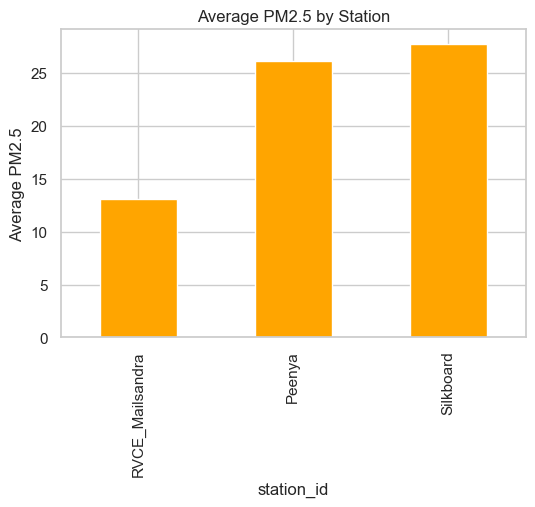

In [19]:
station_avg = df.groupby("station_id")["PM2.5"].mean().sort_values()

plt.figure(figsize=(6,4))
station_avg.plot(kind="bar", color="orange")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 by Station")
plt.show()


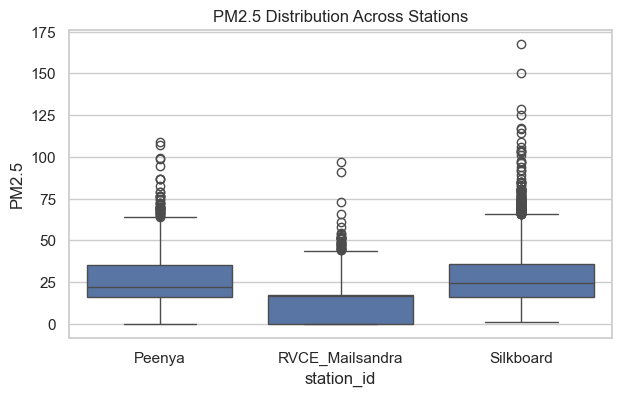

In [20]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="station_id", y="PM2.5")
plt.title("PM2.5 Distribution Across Stations")
plt.show()


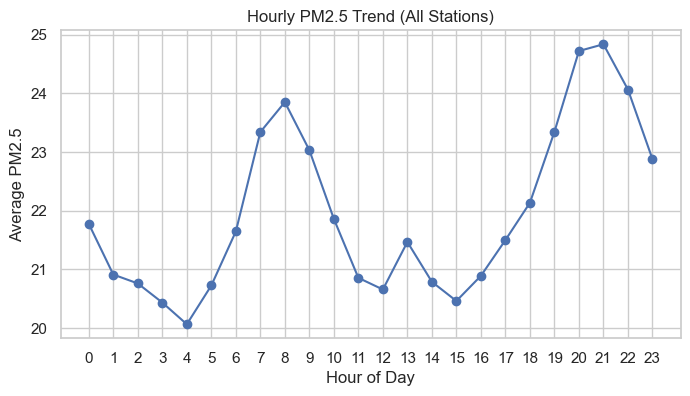

In [21]:
hourly = df.groupby("hour")["PM2.5"].mean()

plt.figure(figsize=(8,4))
plt.plot(hourly.index, hourly.values, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Average PM2.5")
plt.title("Hourly PM2.5 Trend (All Stations)")
plt.xticks(range(0,24))
plt.show()


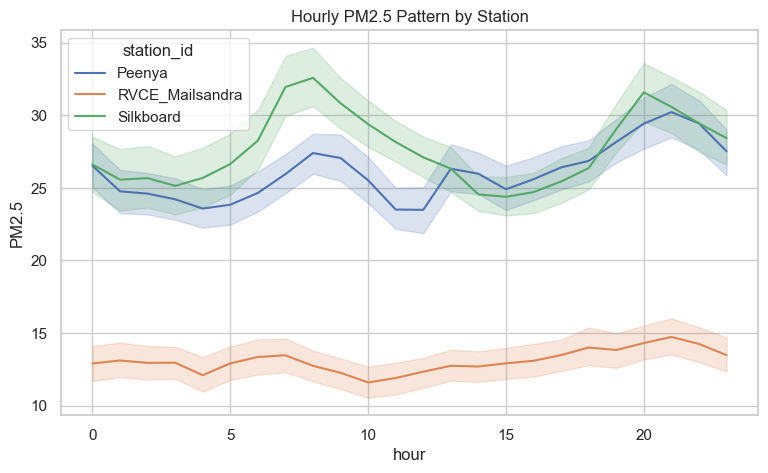

In [22]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df, x="hour", y="PM2.5", hue="station_id")
plt.title("Hourly PM2.5 Pattern by Station")
plt.show()


In [23]:
df["is_any_event"] = (
    (df["is_festival"] == 1) |
    (df["is_secondary_event"] == 1) |
    (df["is_local_event"] == 1)
).astype(int)

event_avg = df.groupby("is_any_event")["PM2.5"].mean()

print(event_avg)


is_any_event
0    21.878094
1    26.498383
Name: PM2.5, dtype: float64


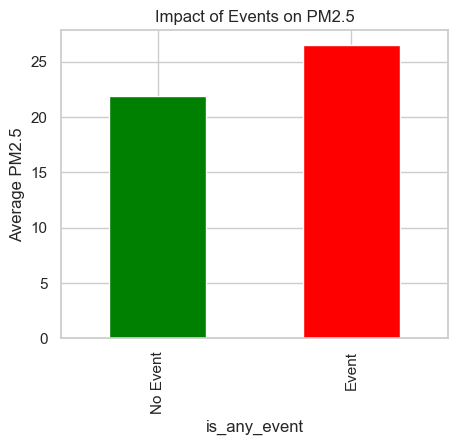

In [24]:
plt.figure(figsize=(5,4))
event_avg.plot(kind="bar", color=["green","red"])
plt.xticks([0,1], ["No Event", "Event"])
plt.ylabel("Average PM2.5")
plt.title("Impact of Events on PM2.5")
plt.show()


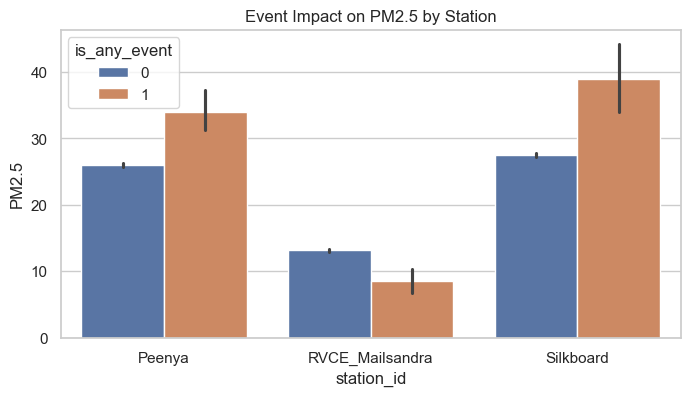

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df,
    x="station_id",
    y="PM2.5",
    hue="is_any_event"
)
plt.title("Event Impact on PM2.5 by Station")
plt.show()


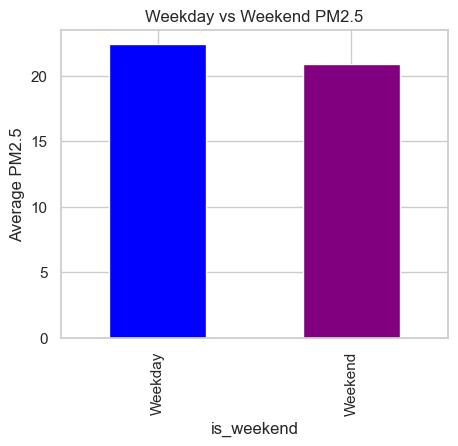

In [26]:
weekday_avg = df.groupby("is_weekend")["PM2.5"].mean()

plt.figure(figsize=(5,4))
weekday_avg.plot(kind="bar", color=["blue","purple"])
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.ylabel("Average PM2.5")
plt.title("Weekday vs Weekend PM2.5")
plt.show()


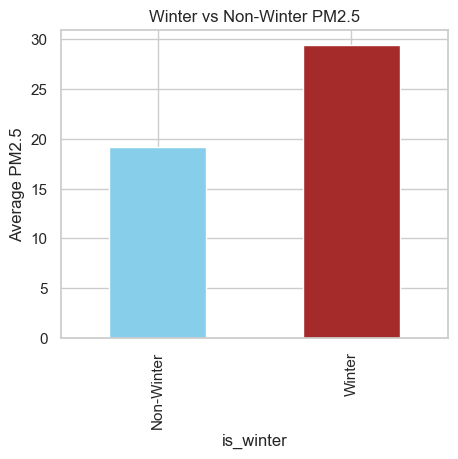

In [27]:
season_avg = df.groupby("is_winter")["PM2.5"].mean()

plt.figure(figsize=(5,4))
season_avg.plot(kind="bar", color=["skyblue","brown"])
plt.xticks([0,1], ["Non-Winter", "Winter"])
plt.ylabel("Average PM2.5")
plt.title("Winter vs Non-Winter PM2.5")
plt.show()


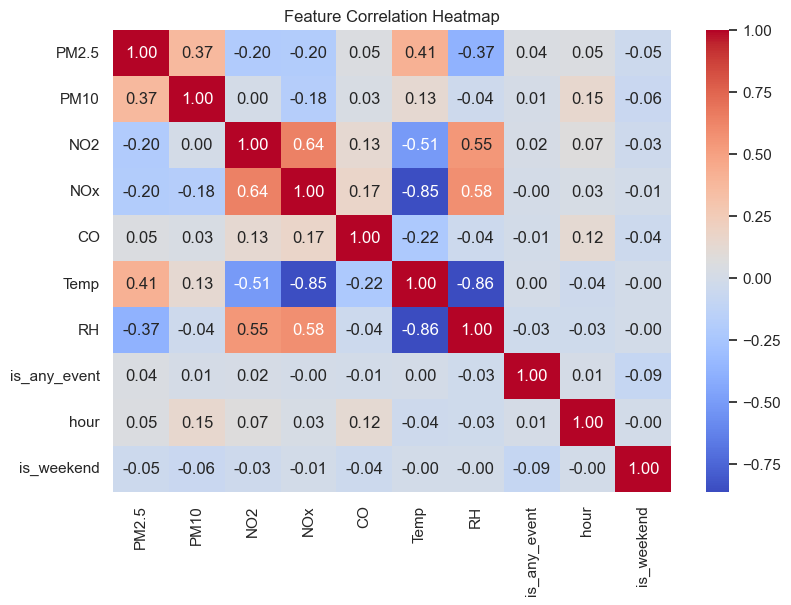

In [28]:
features = [
    "PM2.5", "PM10", "NO2", "NOx", "CO",
    "Temp", "RH",
    "is_any_event", "hour", "is_weekend"
]

plt.figure(figsize=(9,6))
sns.heatmap(
    df[features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()
